# Polynomial Regression Example

In [1]:
import sys
sys.path.append('../../pyLearnAlgorithms')
from pyLearnAlgorithms.load_data import LoadData
from pyLearnAlgorithms.graph_view import GraphView
from pyLearnAlgorithms.polynomial_regression import PolynomialRegression

In [2]:
dataset = LoadData('../tests/datasets', 'WaterLevel.mat')
data = dataset.load_mat()
X, y = data['X'], data['y'][:, 0]
Xtest, ytest = data['Xtest'], data['ytest'][:, 0]
Xval, yval = data['Xval'], data['yval'][:, 0]

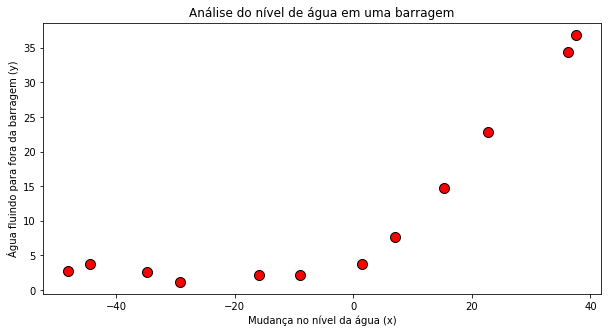

In [3]:
dataset_graph = GraphView(X, y)
dataset_graph.view_data('Mudança no nível da água (x)',
                        'Água fluindo para fora da barragem (y)', 
                        'Análise do nível de água em uma barragem')

In [4]:
regressor = PolynomialRegression(X, y)
X_poly = regressor.polyFeatures(X, 8)
X_poly, mu, sigma = regressor.featureNormalize(X_poly)

In [5]:
Xval = regressor.prepareExtracts(Xval, yval, 8)
Xtest = regressor.prepareExtracts(Xtest, ytest, 8)

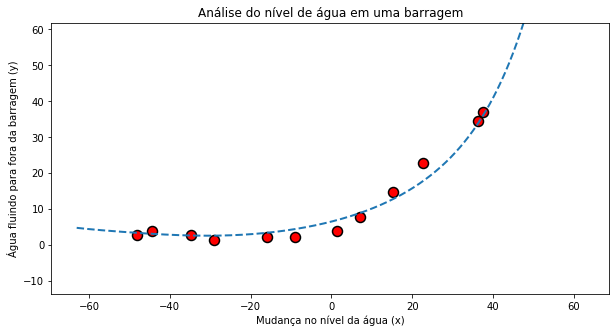

In [6]:
dataset_graph = GraphView(X, y)
dataset_graph.model_poly('Mudança no nível da água (x)',
                         'Água fluindo para fora da barragem (y)', 
                         'Análise do nível de água em uma barragem', 
                         polynomial_degree = 8, 
                         lambda_ = 1, 
                         maxiter = 200)

In [7]:
train_error, val_error = regressor.learningCurve(X_poly, y, Xval, yval, 2.323)
print('# Training Examples\tTraining Error\t\tCross Validation Error')
for i in range(y.size):
    print('{}\t\t\t{}\t{}'.format(i+1, train_error[i], val_error[i]))

# Training Examples	Training Error		Cross Validation Error
1			1.2484536514419903e-16	138.84677722823133
2			0.09212613426757767	143.74631238229634
3			35.599656145035524	8.908705601781055
4			29.83866154531739	8.819969103117076
5			23.88007428411716	9.031378187192402
6			21.027902555259388	10.317713273115178
7			18.675181319623594	9.249996958222688
8			16.359830289904806	9.402630091385547
9			15.235006818353122	10.123819645788135
10			13.741737317146027	9.967144772298028
11			12.506122722931297	10.098067124399826
12			13.26930096299433	9.25412729133126


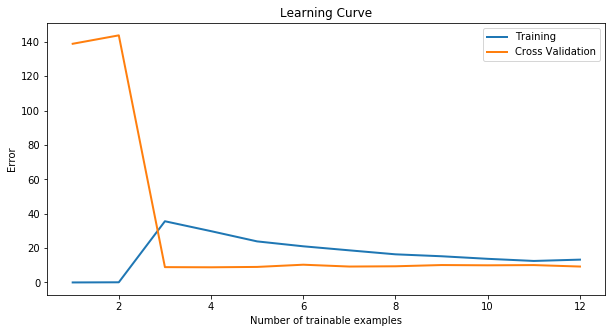

In [8]:
dataset_graph.learning_curve(train_error, val_error)

In [9]:
lambda_vec, error_train, error_val = regressor.validationCurve(X_poly,y,Xval,yval)
print('# Training Examples\tTraining Error\t\tCross Validation Error')
for i in range(y.size):
    print('{}\t\t\t{}\t{}'.format(i+1, train_error[i], val_error[i]))

# Training Examples	Training Error		Cross Validation Error
1			1.2484536514419903e-16	138.84677722823133
2			0.09212613426757767	143.74631238229634
3			35.599656145035524	8.908705601781055
4			29.83866154531739	8.819969103117076
5			23.88007428411716	9.031378187192402
6			21.027902555259388	10.317713273115178
7			18.675181319623594	9.249996958222688
8			16.359830289904806	9.402630091385547
9			15.235006818353122	10.123819645788135
10			13.741737317146027	9.967144772298028
11			12.506122722931297	10.098067124399826
12			13.26930096299433	9.25412729133126


In [10]:
lambda_vec

[0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]

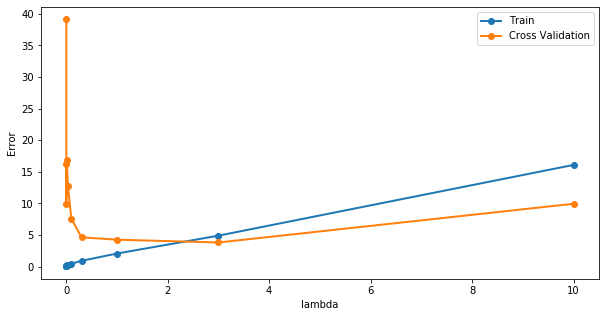

In [11]:
dataset_graph.validation_curve_poly(X_poly, y, Xval, yval, lambda_vec)

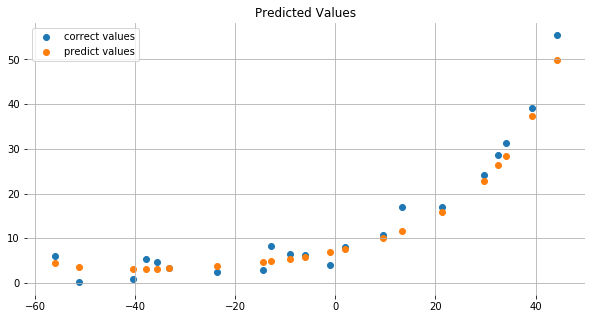

In [12]:
pred = regressor.predict(Xtest, X_poly, y, lambda_ = 2.323) 
dataset_graph.predicted_values(data['Xtest'], ytest, pred)